# Einfluss der Tweets von Elon Musk auf den Tesla Aktienkurs

 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Elon_Musk%2C_Tesla_Factory%2C_Fremont_%28CA%2C_USA%29_%288765031426%29.jpg/1083px-Elon_Musk%2C_Tesla_Factory%2C_Fremont_%28CA%2C_USA%29_%288765031426%29.jpg" alt="Elon Musk and Tesla S" width="400" height="400" align=left>
 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Twitter-logo.svg/150px-Twitter-logo.svg.png" alt="Twitter Logo" width="200" height="200"align=middle>

## Link zu unserer Webapp: https://share.streamlit.io/tobiarnold/text-mining/main/main.py

In [1]:
#from platform import python_version
#print("Folgende Python Version wird verwendet: "+(python_version()))

Folgende Python Version wird verwendet: 3.9.7

Import der Bibliotheken zum Download des Aktienkurses und der Visualisierung.

In [2]:
#pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Download des Akteinkurses und speichern in ein csv File.

In [4]:
#df_tesla = yf.download("TSLA",period="max")["Adj Close"]
#df_tesla.to_csv("tesla.csv")
df_tesla=pd.read_csv(r"tesla.csv")

In [5]:
df_tesla

,Date,Adj Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2980,2022-04-29,870.760010
2981,2022-05-02,902.940002
2982,2022-05-03,909.250000
2983,2022-05-04,952.619995


In [6]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2985 non-null   object 
 1   Adj Close  2985 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.8+ KB


In [7]:
df_tesla.describe()

,Adj Close
count,2985.000000
mean,147.115743
std,262.921696
min,3.160000
25%,20.440001
50%,46.958000
75%,68.769997
max,1229.910034


Umbennenen der Spalten und umwandeln der Spalte "Date" in ein datetime object.

In [8]:
df_tesla=df_tesla.rename(columns={"Adj Close": "Tesla Stock Price"})
df_tesla["Date"] = pd.to_datetime(df_tesla["Date"])

Einfügen der Spalte für die %-Veränderung (Vergleich mit dem Vortag).

In [9]:
df_tesla_percent=df_tesla
df_tesla_percent=df_tesla_percent.set_index("Date")
df_tesla_percent=df_tesla_percent.pct_change()
df_tesla_percent[["Tesla Stock Price"]] =df_tesla_percent[["Tesla Stock Price"]].apply(lambda x: x*100)
df_tesla_percent=df_tesla_percent.rename(columns={"Tesla Stock Price": "%-Change"})
df_tesla_percent=df_tesla_percent.reset_index()

Generieren der Grafiken für den Tesla Aktienkurs und die Wachstumsrate. <br>
Interessant vorallem Daten ab Ende 2019/ Anfang 2020, da hier der Akteinkurs stark zunahm.

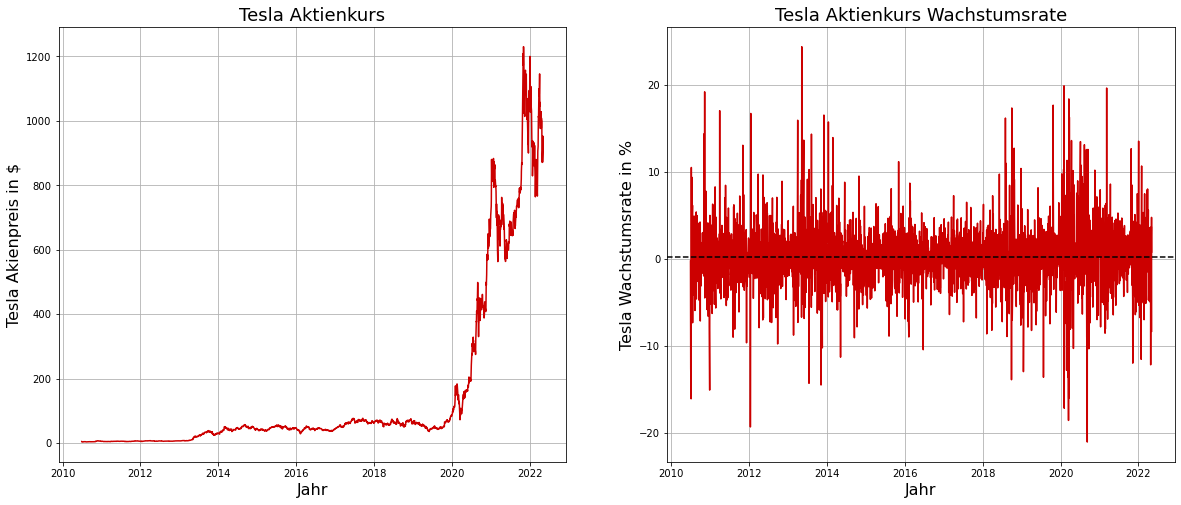

In [10]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
axes[0].plot(df_tesla["Date"], df_tesla["Tesla Stock Price"],color="#cc0000")
axes[0].set_xlabel("Jahr",fontsize=16)
axes[0].set_ylabel("Tesla Akienpreis in $",fontsize=16)
axes[0].set_title("Tesla Aktienkurs", fontsize=18)
axes[0].grid(visible=True)
axes[1].plot(df_tesla_percent["Date"], df_tesla_percent["%-Change"],color="#cc0000")
axes[1].set_xlabel("Jahr",fontsize=16)
axes[1].set_ylabel("Tesla Wachstumsrate in %",fontsize=16)
axes[1].set_title("Tesla Aktienkurs Wachstumsrate", fontsize=18)
line=axes[1].axhline(y=df_tesla_percent["%-Change"].mean(), color="black",linestyle="dashed")
axes[1].grid(visible=True);

Mergen des Aktienkurses mit der %-Veränderung.

In [11]:
df_tesla = pd.merge(df_tesla, df_tesla_percent, how="inner", on="Date")

In [12]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985 entries, 0 to 2984
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2985 non-null   datetime64[ns]
 1   Tesla Stock Price  2985 non-null   float64       
 2   %-Change           2984 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 93.3 KB


### Einfügen einer Spalte die aufzeigt, ob der Aktienkurs im Vergleich zum Vortag höher (Higher) oder niedriger (Lower) ist.

In [13]:
df_tesla["Change"] = np.where(df_tesla["Tesla Stock Price"] > df_tesla["Tesla Stock Price"].shift(),"Higher","Lower")

In [14]:
df_tesla.tail()

,Date,Tesla Stock Price,%-Change,Change
2980,2022-04-29,870.760010,-0.769222,Lower
2981,2022-05-02,902.940002,3.695621,Higher
2982,2022-05-03,909.250000,0.698828,Higher
2983,2022-05-04,952.619995,4.769865,Higher
2984,2022-05-05,873.280029,-8.328606,Lower


Countplot der Veränderungen der prozentuallen Veränderung des Aktienkurses.

,Date,Tesla Stock Price,%-Change
Change,,,
Higher,1545,1545,1545
Lower,1440,1440,1439


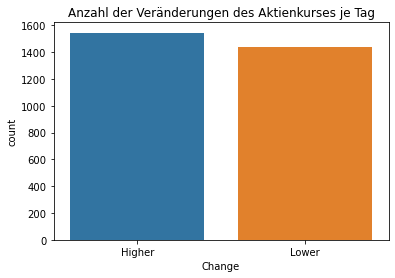

In [15]:
ax = sns.countplot(x="Change", data=df_tesla,order=["Higher","Lower"]).set(
    title="Anzahl der Veränderungen des Aktienkurses je Tag");
df_tesla.groupby("Change").count()

Scrappen der Daten von Twitter mit der snscrape Bibliothek.

Python Version muss bei 3.8 oder höher liegen.

In [16]:
#pip install snscrape

Quelle: https://github.com/MartinBeckUT/TwitterScraper/blob/master/snscrape/python-wrapper/snscrape-python-wrapper.ipynb

In [17]:
import snscrape.modules.twitter as sntwitter

Speichern der Tweets zwischen dem 01.12.2019 und dem 05.05.2022 von Elon Musk in einem csv File

In [18]:
# Quelle: https://github.com/MartinBeckUT/TwitterScraper/blob/master/snscrape/python-wrapper/snscrape-python-wrapper.ipynb
def get_tweets():
    tweets = []
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper
                             ("from:elonmusk since:2019-12-01 until:2022-05-05").get_items()):
        if i>100000:
            break            
        tweets.append([tweet.date, tweet.content, tweet.likeCount, tweet.retweetCount, tweet.replyCount])
    tweets_elon = pd.DataFrame(tweets, columns=["Date", "Text", "likes","retweets","replys"])
    tweets_elon.to_csv("elon_musk.csv", sep=",", index=False)
#get_tweets()

In [19]:
# Einlesen der Tweets als csv und Kleinschreibung des gesamten Textes
df_elon=pd.read_csv(r"elon_musk.csv").apply(lambda x: x.astype(str).str.lower())

In [20]:
df_elon.head()

,Date,Text,likes,retweets,replys
0,2022-05-04 23:41:50+00:00,"@bevedoni if that’s true, it would make me ver...",192912,6855,10466
1,2022-05-04 22:06:58+00:00,@cathiedwood passive/index investment is simpl...,9182,778,670
2,2022-05-04 20:32:01+00:00,interesting. i wonder if those funding these o...,131640,22975,12756
3,2022-05-04 11:03:33+00:00,i dunno … seems kinda fungible,449093,30580,34751
4,2022-05-04 08:32:54+00:00,@slashdot slashdot has some of the best comments,10192,497,1192


In [21]:
df_elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7837 entries, 0 to 7836
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      7837 non-null   object
 1   Text      7837 non-null   object
 2   likes     7837 non-null   object
 3   retweets  7837 non-null   object
 4   replys    7837 non-null   object
dtypes: object(5)
memory usage: 306.3+ KB


In [22]:
df_elon.describe()

,Date,Text,likes,retweets,replys
count,7837,7837,7837,7837,7837
unique,7837,7727,6654,2929,2782
top,2022-05-04 23:41:50+00:00,@billym2k 🤣,2019,64,77
freq,1,14,5,34,27


Änderung der Spalte Date in Format Jahr-Monat-Tag und umwandeln der Spalten likes, retweets, replys in integers.

In [23]:
df_elon["Date"] = pd.to_datetime(df_elon["Date"])
df_elon["Date"] = df_elon["Date"].dt.strftime("%Y-%m-%d")
columns = ["likes","retweets","replys"]
df_elon[columns] = df_elon[columns].apply(pd.to_numeric, errors="coerce", axis=1)

In [24]:
pd.set_option("display.float_format", lambda x: "%.0f" % x)
df_elon.describe()

,likes,retweets,replys
count,7837,7837,7837
mean,45646,3951,2338
std,138709,16387,7584
min,174,8,0
25%,2825,119,141
50%,7357,333,375
75%,25631,1343,1179
max,4866921,709945,195547


In [25]:
df_elon.head()

,Date,Text,likes,retweets,replys
0,2022-05-04,"@bevedoni if that’s true, it would make me ver...",192912,6855,10466
1,2022-05-04,@cathiedwood passive/index investment is simpl...,9182,778,670
2,2022-05-04,interesting. i wonder if those funding these o...,131640,22975,12756
3,2022-05-04,i dunno … seems kinda fungible,449093,30580,34751
4,2022-05-04,@slashdot slashdot has some of the best comments,10192,497,1192


Generieren einer Grafik zur Visualisierung der Anzahl der Tweets von Elon Musk. <br>
Die Schwarze Linie zeigt den Durchschnitt auf.

In [26]:
df_elon["Date"] = pd.to_datetime(df_elon["Date"])
df_count = df_elon.groupby(df_elon["Date"].dt.date).size().reset_index(name="Count")

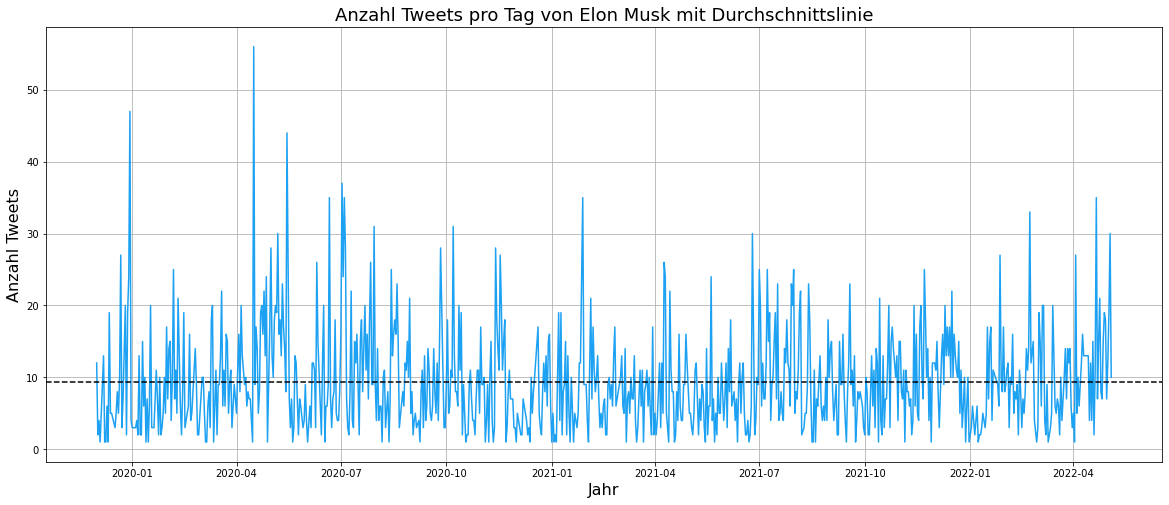

In [27]:
fig, axes = plt.subplots(1,1, figsize=(20,8))
plt.plot(df_count["Date"], df_count["Count"],color="#1DA1F2")
plt.xlabel("Jahr",fontsize=16)
plt.ylabel("Anzahl Tweets",fontsize=16)
plt.title("Anzahl Tweets pro Tag von Elon Musk mit Durchschnittslinie", fontsize=18)
plt.axhline(y=df_count["Count"].mean(), color="black",linestyle="dashed")
plt.grid(visible=True);

Generieren einer Grafik, welche die Anzahl der Tweets von Elon Musk und den Tesla Aktienkurs bzw. die prozentuale Veränderung des Akteinkurses aufzeigt.

In [28]:
df_count["Date"] = pd.to_datetime(df_count["Date"])
df_all_data = pd.merge(df_tesla, df_count, how="inner", on="Date")

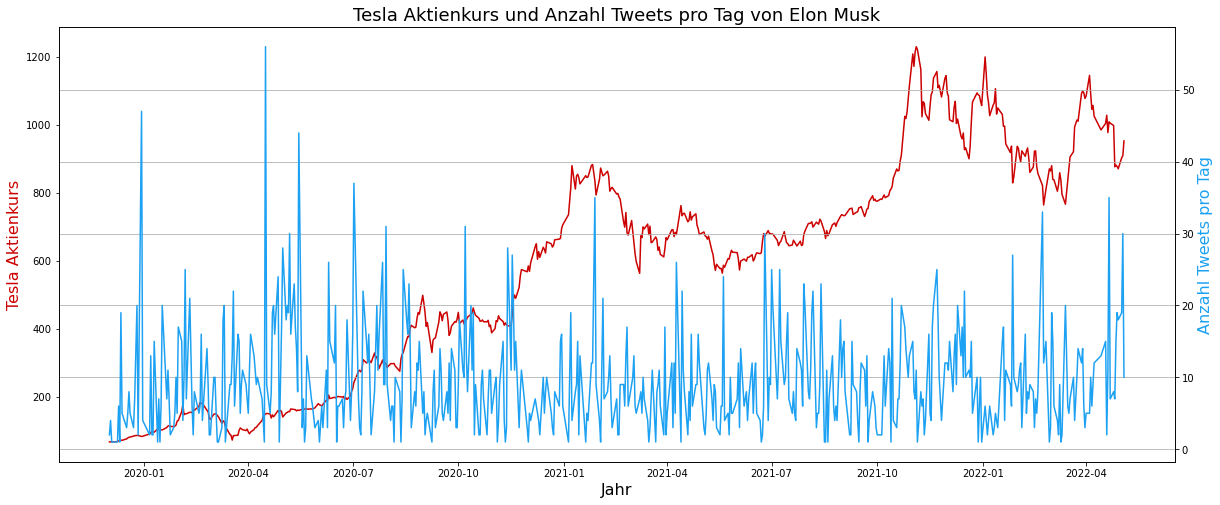

In [29]:
fig,ax = plt.subplots(1,1, figsize=(20,8))
ax.plot(df_all_data["Date"], df_all_data["Tesla Stock Price"], color="#cc0000")
ax.set_xlabel("Jahr",fontsize=16)
ax.set_ylabel("Tesla Aktienkurs",color="#cc0000",fontsize=16)
ax2=ax.twinx()
ax2.plot(df_all_data["Date"], df_all_data["Count"], color="#1DA1F2")
ax2.set_ylabel("Anzahl Tweets pro Tag",color="#1DA1F2",fontsize=16)
plt.title("Tesla Aktienkurs und Anzahl Tweets pro Tag von Elon Musk", fontsize=18)
plt.grid(visible=True);

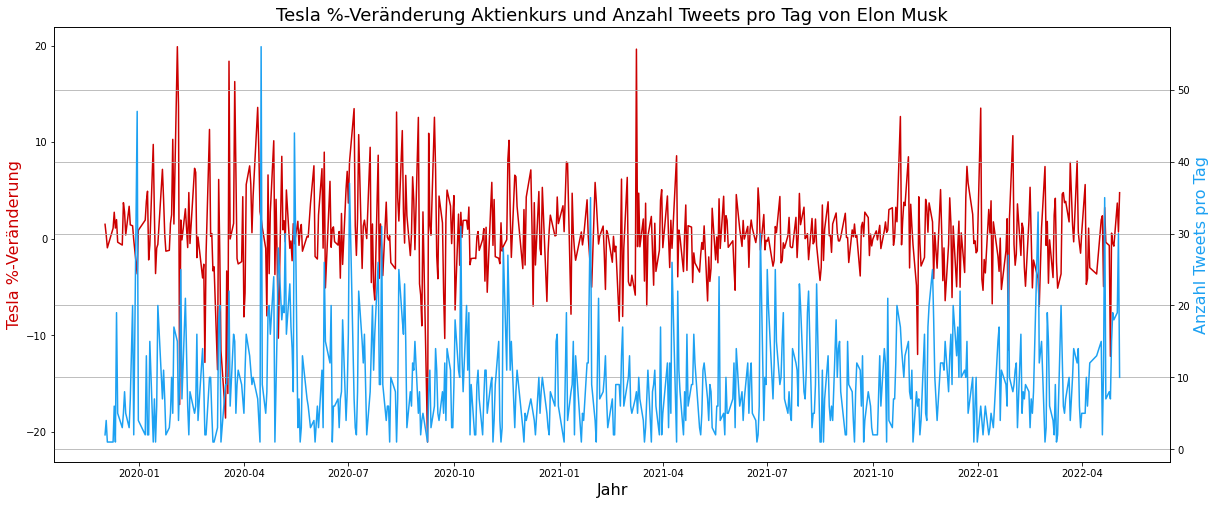

In [30]:
fig,ax = plt.subplots(1,1, figsize=(20,8))
ax.plot(df_all_data["Date"], df_all_data["%-Change"], color="#cc0000")
ax.set_xlabel("Jahr",fontsize=16)
ax.set_ylabel("Tesla %-Veränderung",color="#cc0000",fontsize=16)
ax2=ax.twinx()
ax2.plot(df_all_data["Date"], df_all_data["Count"], color="#1DA1F2")
ax2.set_ylabel("Anzahl Tweets pro Tag",color="#1DA1F2",fontsize=16)
plt.title("Tesla %-Veränderung Aktienkurs und Anzahl Tweets pro Tag von Elon Musk", fontsize=18)
plt.grid(visible=True);

Berechnen der Korrelation zwischen der Anzahl der Tweets (Count) und dem Aktienkurs (Tesla Stock Price) bzw. der prozentaullen Veränderung (%-Change).

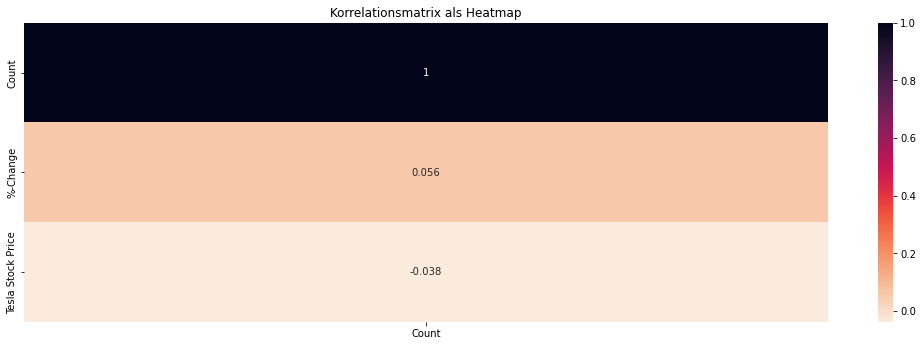

In [31]:
plt.figure(figsize=(18,5.5))
corr=df_all_data.corr()
corr=corr[["Count"]]
corr=corr.sort_values(by="Count", ascending=False)
sns.heatmap(corr, cmap="rocket_r",annot=True).set(title="Korrelationsmatrix als Heatmap")
plt.show()

Die Anzahl der Tweets hat wohl keinen signifikaten Einfluss auf den Aktienkurs von Tesla.

# Natural Language Processing der Tweets von Elon Musk

Installation und Import der benötigten Bibliotheken.

In [32]:
#conda install -c conda-forge wordcloud
#pip install textblob
#pip install flair
#pip install tqdm

In [33]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import figure
from collections import Counter
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob
import warnings
from nltk.sentiment import SentimentIntensityAnalyzer
import flair
from flair.models import TextClassifier
from flair.data import Sentence
from tqdm import tqdm

In [34]:
#nltk.download("vader_lexicon")

Erzeugen (und einlesen) einer seperaten csv Datei der Tweets von Elon Musk zum Bereinigen dieser.

In [35]:
df_elon.to_csv("elon_musk_tweets_for_nlp.csv", sep=",", index=False)
elon_musk_tweets_for_nlp=pd.read_csv(r"elon_musk_tweets_for_nlp.csv")

In [36]:
elon_musk_tweets_for_nlp.head()

,Date,Text,likes,retweets,replys
0,2022-05-04,"@bevedoni if that’s true, it would make me ver...",192912,6855,10466
1,2022-05-04,@cathiedwood passive/index investment is simpl...,9182,778,670
2,2022-05-04,interesting. i wonder if those funding these o...,131640,22975,12756
3,2022-05-04,i dunno … seems kinda fungible,449093,30580,34751
4,2022-05-04,@slashdot slashdot has some of the best comments,10192,497,1192


Bereinigen der Tweets mittels regular Expressions.

In [37]:
#@ Zeichen und Wort danach entfernen
elon_musk_tweets_for_nlp["Text"]=elon_musk_tweets_for_nlp["Text"].str.replace("@[a-z0-9_]+","",regex=True)
#Sonderzeichen entfernen außer Satzzeichen
elon_musk_tweets_for_nlp["Text"]=elon_musk_tweets_for_nlp["Text"].str.replace("[^\w\s\?\!\.]", "",regex=True)
#https und Wort danach entfernen
elon_musk_tweets_for_nlp["Text"] = elon_musk_tweets_for_nlp["Text"].str.replace("http[^\s]*","",regex=True)
#amp entfernen
elon_musk_tweets_for_nlp["Text"]=elon_musk_tweets_for_nlp["Text"].str.replace("amp","")
#alle Zeilen mit weniger als 4 Wörtern entfernen
elon_musk_tweets_for_nlp = elon_musk_tweets_for_nlp[elon_musk_tweets_for_nlp["Text"].str.split().str.len().gt(3)] 
#\n\n entfernen
elon_musk_tweets_for_nlp["Text"]=elon_musk_tweets_for_nlp["Text"].str.replace("\n\n"," ")
#als csv speichern
elon_musk_tweets_for_nlp.to_csv("elon_musk_tweets_for_nlp.csv", sep=",", index=False)

Generieren einer Grafik, die die 30 häufigsten Wörter in den Tweets von Elon Musk aufzeigt (mit stopwords)

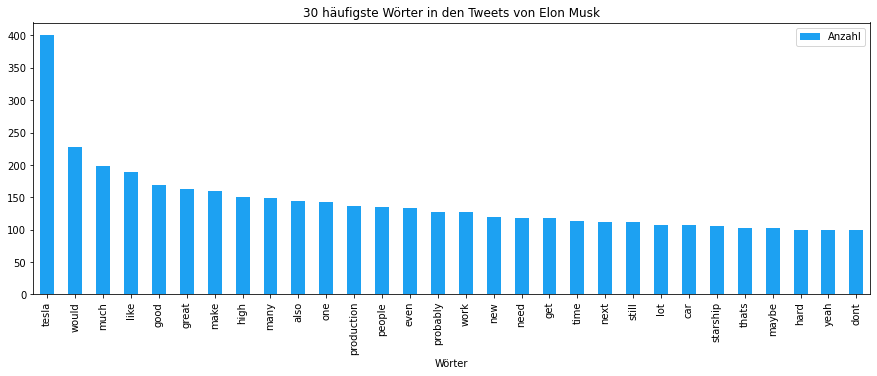

In [38]:
warnings.filterwarnings("ignore")
try:
    stopwords_nltk=stopwords.words("english")
except:
    pass
stopwords=[]
stopwords.extend(stopwords_nltk)
with open(r"elon_musk_tweets_for_nlp.csv",encoding="utf8") as f:
    count = Counter(word for line in f for word in line.split() if word not in stopwords)
lst = count.most_common(30)
df = pd.DataFrame(lst, columns = ["Wörter", "Anzahl"])
df.plot.bar(x="Wörter",y="Anzahl",figsize=(15,5),color="#1DA1F2", title="30 häufigste Wörter in den Tweets von Elon Musk");

Wordcloud ohne Stopwords.

In [39]:
def word_cloud_without_stopwords():
    wordcloud=WordCloud(background_color="black",colormap="Dark2")
    wordcloud.generate(text)
    plt.figure( figsize=(20,10))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

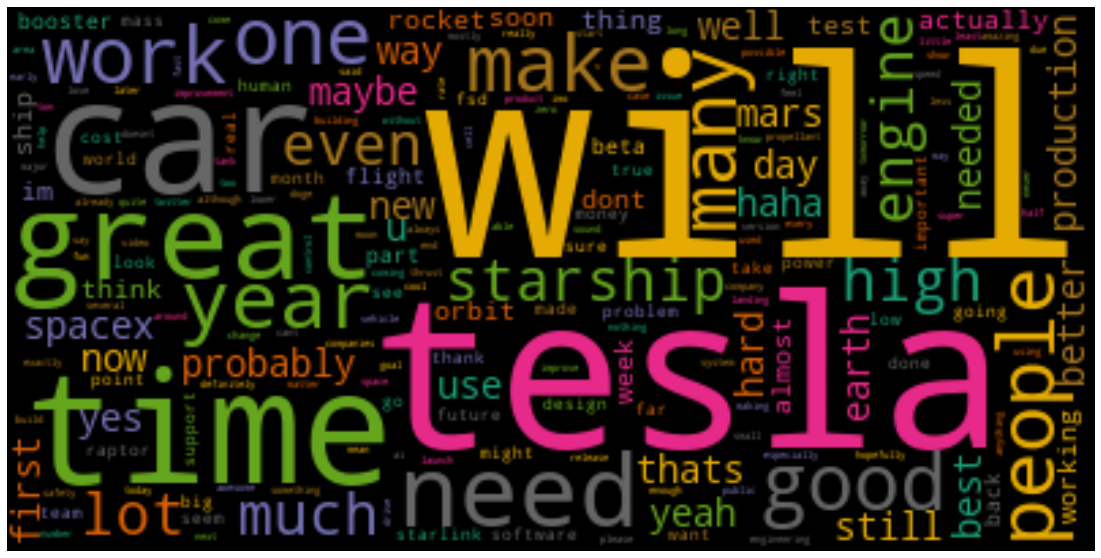

In [40]:
with open(r"elon_musk_tweets_for_nlp.csv",encoding="utf8") as f:
    text = f.read()
word_cloud_without_stopwords()

Wordcloud mit Stopwords und auf maximal 60 Wörter verkürzt.

In [41]:
def word_cloud_with_stopwords():
    stopwords_wordcloud = set(STOPWORDS)
    stopwords_wordcloud.update(["will"])
    wordcloud=WordCloud(background_color="black",colormap="Dark2",stopwords = stopwords_wordcloud, max_words=60)
    wordcloud.generate(text)
    plt.figure( figsize=(20,10))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

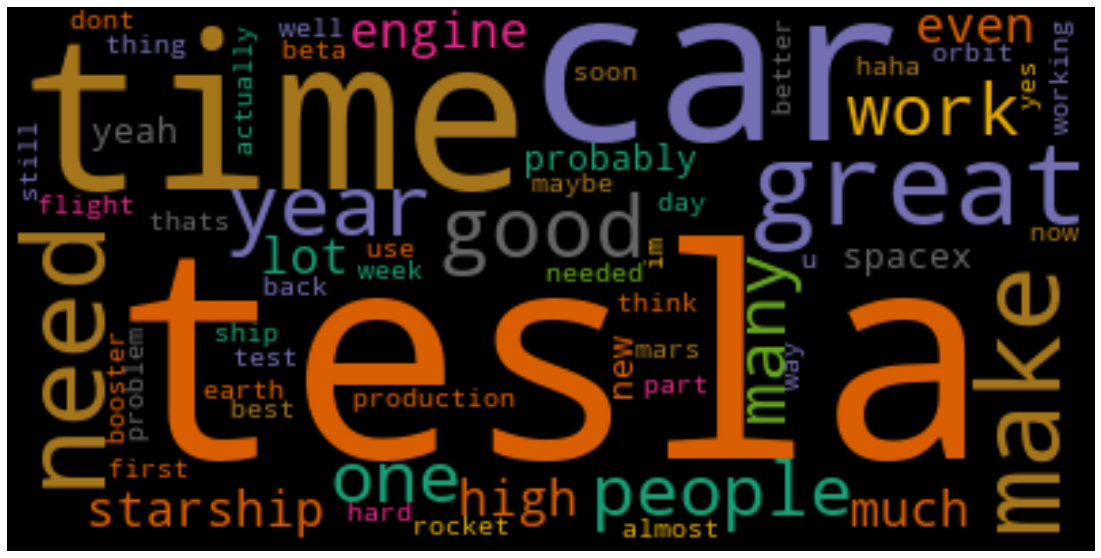

In [42]:
with open(r"elon_musk_tweets_for_nlp.csv",encoding="utf8") as f:
    text = f.read()
word_cloud_with_stopwords()

### Sentiment Analyse

Verwendete Bibliotheken: textblob, nltk und flair

Mittels der Textblob Bibliothek lassen sich die "polarity" und die "subjectivity" von Texten messen.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]. <br>
Quelle: https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/

In [43]:
pd.set_option("display.float_format", lambda x: "%.4f" % x)

In [44]:
df_elon_sentiment=elon_musk_tweets_for_nlp

In [45]:
df_elon_sentiment["polarity_textblob"] = df_elon_sentiment["Text"].apply(
    lambda tweet: TextBlob(tweet).sentiment.polarity)

In [46]:
df_elon_sentiment["subjectivity_textblob"] = df_elon_sentiment["Text"].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

In [47]:
df_elon_sentiment.head()

,Date,Text,likes,retweets,replys,polarity_textblob,subjectivity_textblob
0,2022-05-04,if thats true it would make me very happy!,192912,6855,10466,0.6750,0.8250
1,2022-05-04,passiveindex investment is simply an lifier o...,9182,778,670,0.0200,0.4482
2,2022-05-04,interesting. i wonder if those funding these o...,131640,22975,12756,0.3750,0.3750
3,2022-05-04,i dunno seems kinda fungible,449093,30580,34751,0.0000,0.0000
4,2022-05-04,slashdot has some of the best comments,10192,497,1192,1.0000,0.3000


In [48]:
df_elon_sentiment.describe()

,likes,retweets,replys,polarity_textblob,subjectivity_textblob
count,5106.0000,5106.0000,5106.0000,5106.0000,5106.0000
mean,46950.0456,4108.2681,2515.8617,0.1293,0.3834
std,146799.2490,17387.4084,7917.3196,0.2795,0.3010
min,174.0000,10.0000,12.0000,-1.0000,0.0000
25%,2983.5000,145.0000,156.0000,0.0000,0.0000
50%,7798.5000,402.0000,408.0000,0.0222,0.4000
75%,29216.7500,1701.7500,1382.7500,0.2500,0.6000
max,4866921.0000,709945.0000,195547.0000,1.0000,1.0000


Histogram der Ploarity und Subjectivity.<br>
Viele Werte bei 0 sprich neutral.

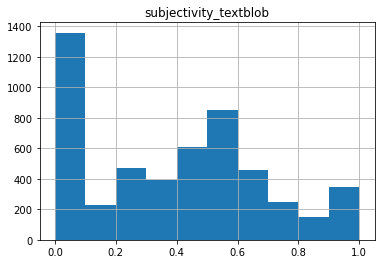

In [49]:
df_elon_sentiment.hist(column="subjectivity_textblob");

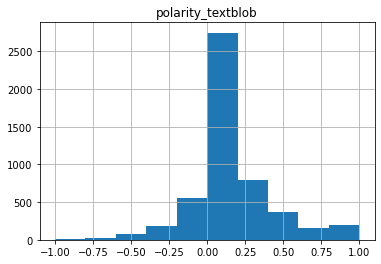

In [50]:
df_elon_sentiment.hist(column="polarity_textblob");

Scatterplot der Ploarity und der Subjectivity der mittels textblob klassifizierten Tweets.

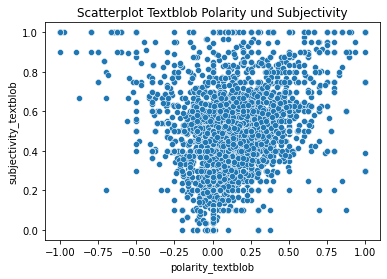

In [51]:
sns.scatterplot(data=df_elon_sentiment, x="polarity_textblob", y="subjectivity_textblob").set(title="Scatterplot Textblob Polarity und Subjectivity");

Dataframe der semtiment Analyse mit dem Aktienkurs verknüpfen.

In [52]:
df_elon_sentiment["Date"] = pd.to_datetime(df_elon_sentiment["Date"])
df_tweets_and_stock = pd.merge(df_tesla, df_elon_sentiment, how="inner", on="Date")

Tweets in postiv, neutral und negativ unterteilen, hierzu wird die polarity verwendet.<br>
Die subjectivity wird im weiteren Verlauf nicht benötigt und wird aus dem Dataframe entfernt.

In [53]:
df_tweets_and_stock = df_tweets_and_stock.drop("subjectivity_textblob", 1)

In [54]:
df_tweets_and_stock["sentiment_textblob"] =df_tweets_and_stock["polarity_textblob"].apply(
    lambda x: "positive" if x>0 else "neutral" if x==0 else "negative")                                                                       

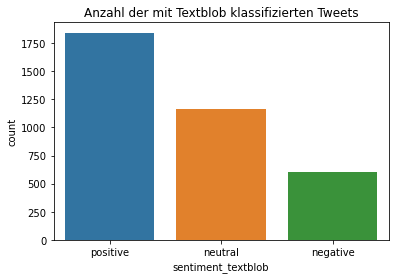

In [55]:
ax = sns.countplot(x="sentiment_textblob", data=df_tweets_and_stock,order=["positive","neutral","negative"]).set(title="Anzahl der mit Textblob klassifizierten Tweets");

In [56]:
df_tweets_and_stock.head()

,Date,Tesla Stock Price,%-Change,Change,Text,likes,retweets,replys,polarity_textblob,sentiment_textblob
0,2019-12-02,66.9740,1.4942,Higher,people often think theyre breathing oxygen but...,309030,38476,6903,0.0000,neutral
1,2019-12-02,66.9740,1.4942,Higher,hydrogen is a light odorless gas which given e...,163401,11498,2564,0.2000,positive
2,2019-12-03,67.2400,0.3972,Higher,after a while hydrogen became sentient,2270,88,102,0.0000,neutral
3,2019-12-03,67.2400,0.3972,Higher,bravo right thing to do! short selling shou...,2890,217,345,-0.0476,negative
4,2019-12-04,66.6060,-0.9429,Lower,launching third flight of this dragon spacecra...,30853,1939,638,0.0000,neutral


Der code für die Bibliotheken nltk und flair stammt von einem Artikel auf towardsdatascience. </br>
Quelle: https://towardsdatascience.com/the-best-python-sentiment-analysis-package-1-huge-common-mistake-d6da9ad6cdeb

In [57]:
#Quelle: https://towardsdatascience.com/the-best-python-sentiment-analysis-package-1-huge-common-mistake-d6da9ad6cdeb
nltk_sentiment = SentimentIntensityAnalyzer()
df_tweets_and_stock["polarity_nltk"] = df_tweets_and_stock["Text"].apply(
    lambda x: nltk_sentiment.polarity_scores(x)["compound"])
df_tweets_and_stock["sentiment_nltk"] = np.select([df_tweets_and_stock["polarity_nltk"] < 0, 
                                              df_tweets_and_stock["polarity_nltk"] == 0, 
                                              df_tweets_and_stock["polarity_nltk"] > 0],
                                               ["negative", "neutral", "positive"])

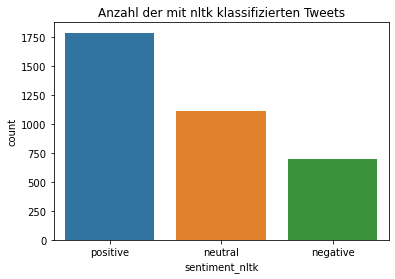

In [58]:
ax = sns.countplot(x="sentiment_nltk", data=df_tweets_and_stock,order=["positive","neutral","negative"]).set(title="Anzahl der mit nltk klassifizierten Tweets");

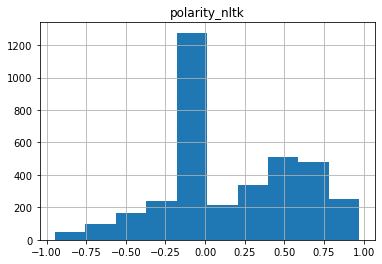

In [59]:
df_tweets_and_stock.hist(column="polarity_nltk");

In [60]:
df_tweets_and_stock.head()

,Date,Tesla Stock Price,%-Change,Change,Text,likes,retweets,replys,polarity_textblob,sentiment_textblob,polarity_nltk,sentiment_nltk
0,2019-12-02,66.9740,1.4942,Higher,people often think theyre breathing oxygen but...,309030,38476,6903,0.0000,neutral,0.0000,neutral
1,2019-12-02,66.9740,1.4942,Higher,hydrogen is a light odorless gas which given e...,163401,11498,2564,0.2000,positive,0.0000,neutral
2,2019-12-03,67.2400,0.3972,Higher,after a while hydrogen became sentient,2270,88,102,0.0000,neutral,0.0000,neutral
3,2019-12-03,67.2400,0.3972,Higher,bravo right thing to do! short selling shou...,2890,217,345,-0.0476,negative,-0.5983,negative
4,2019-12-04,66.6060,-0.9429,Lower,launching third flight of this dragon spacecra...,30853,1939,638,0.0000,neutral,0.0000,neutral


Im Folgenden werden die Tweets noch mittels der Flair Bibliothek klassifiert, allerdings ist diese sehr langsam und klassifiziert die Tweets nur in positiv und negativ. Im weiteren Verlauf wird diese deshalb nicht mehr weiter benutzt.

In [61]:
#flair_sentiment=TextClassifier.load("sentiment")

Mittels progress_apply der tqdm Bibliothek kann der Fortschritt der Klassifizierung mittels flair angezeigt werden.

In [62]:
#Quelle: https://towardsdatascience.com/the-best-python-sentiment-analysis-package-1-huge-common-mistake-d6da9ad6cdeb
def flair_prediction(x):
    sentence = Sentence(x)
    flair_sentiment.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "positive"
    elif "NEGATIVE" in str(score):
        return "negative"
    else:
        return "neutral"
tqdm.pandas()
#df_tweets_and_stock["flair_sentiment"] = df_tweets_and_stock["Text"].progress_apply(flair_prediction)

Abspeichern als csv

In [63]:
#df_tweets_and_stock.to_csv("tweets_with_flair.csv")
tweets_with_flair=pd.read_csv(r"tweets_with_flair.csv")

Flair klassifiziert nur in Positiv und Negativ.

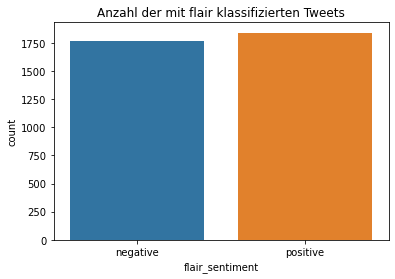

In [64]:
ax = sns.countplot(x="flair_sentiment", data=tweets_with_flair).set(title="Anzahl der mit flair klassifizierten Tweets");

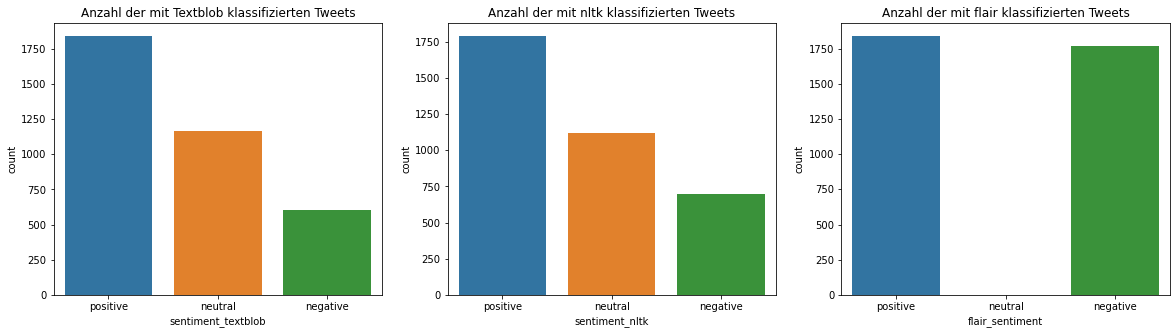

In [65]:
fig, axs = plt.subplots(ncols = 3, figsize = (20,5))
sns.countplot(x = "sentiment_textblob", data = df_tweets_and_stock, order = ["positive","neutral","negative"],
              ax = axs[0]).set(title = "Anzahl der mit Textblob klassifizierten Tweets");
sns.countplot(x = "sentiment_nltk", data = df_tweets_and_stock, order = ["positive","neutral","negative"],
              ax = axs[1]).set(title = "Anzahl der mit nltk klassifizierten Tweets");
sns.countplot(x = "flair_sentiment", data = tweets_with_flair, order = ["positive","neutral","negative"],
              ax = axs[2]).set(title = "Anzahl der mit flair klassifizierten Tweets");

Die flair Bibliothek wird im Folgenden nicht mehr weiter beachtet.

In [66]:
df_tweets_and_stock.describe()

,Tesla Stock Price,%-Change,likes,retweets,replys,polarity_textblob,polarity_nltk
count,3608.0000,3608.0000,3608.0000,3608.0000,3608.0000,3608.0000,3608.0000
mean,564.4606,0.7985,48000.7381,4264.0543,2576.9127,0.1273,0.1797
std,321.1774,4.8192,160394.7700,19194.5712,8551.3788,0.2803,0.3977
min,66.6060,-21.0628,174.0000,10.0000,12.0000,-1.0000,-0.9475
25%,241.7320,-1.8197,3103.7500,151.0000,161.0000,0.0000,0.0000
50%,640.0850,0.5219,7855.5000,419.0000,408.5000,0.0167,0.0000
75%,818.3200,3.1163,30198.7500,1762.2500,1371.5000,0.2500,0.4939
max,1229.9100,19.8949,4866921.0000,709945.0000,195547.0000,1.0000,0.9725


In [67]:
comparison= np.where(df_tweets_and_stock["sentiment_textblob"] == df_tweets_and_stock["sentiment_nltk"], True, False)
df_tweets_and_stock["equal"] = comparison
df_tweets_and_stock.equal.value_counts()

True     2235
False    1373
Name: equal, dtype: int64

2235 Tweets werden von textblob und nltk gleich klassifiziert, 1373 anders. 

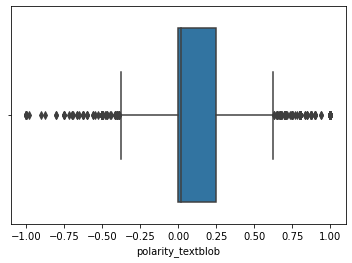

In [68]:
ax = sns.boxplot(x="polarity_textblob", data=df_tweets_and_stock)

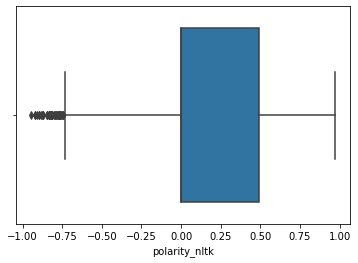

In [69]:
ax = sns.boxplot(x="polarity_nltk", data=df_tweets_and_stock)

Es werden alle Zeilen behalten, bei denen textblob und nltk das gleiche Ergebnis bei positiv, neutral oder negativ liefern. Anschließend werden die neutralen Zeilen enfernt, da diese keine Aussagekraft haben.

In [70]:
cols = ["sentiment_textblob","sentiment_nltk"]
df_tweets_and_stock["new_sentiment"] =df_tweets_and_stock[cols].eq(df_tweets_and_stock[cols[0]], axis=0).all(axis=1)
df_tweets_and_stock = df_tweets_and_stock[df_tweets_and_stock.new_sentiment]
df_tweets_and_stock = df_tweets_and_stock.drop("new_sentiment", 1)
df_tweets_and_stock =df_tweets_and_stock[df_tweets_and_stock["sentiment_textblob"] != "neutral"]
#df_tweets_and_stock=df_tweets_and_stock[df_tweets_and_stock["sentiment_textblob"].str.contains("neutral")==False]

In [71]:
df_tweets_and_stock.head()

,Date,Tesla Stock Price,%-Change,Change,Text,likes,retweets,replys,polarity_textblob,sentiment_textblob,polarity_nltk,sentiment_nltk,equal
3,2019-12-03,67.2400,0.3972,Higher,bravo right thing to do! short selling shou...,2890,217,345,-0.0476,negative,-0.5983,negative,True
5,2019-12-09,67.9060,1.0837,Higher,yeah its one of my favorite tshirts!,12651,251,172,0.6250,positive,0.6696,positive,True
6,2019-12-10,69.7680,2.7420,Higher,they smashed the window to steal the radio w...,10511,287,261,0.4300,positive,0.8622,positive,True
7,2019-12-10,69.7680,2.7420,Higher,yeah 1978 320i that i bought in 93 for 1400....,3797,139,88,-0.2500,negative,-0.2732,negative,True
10,2019-12-10,69.7680,2.7420,Higher,just wish russ mitchell would impro...,1266,105,166,0.2500,positive,0.7088,positive,True


In [72]:
print("Anzahl der Aktienkurse die mit Higher klassifiziert sind:",df_tweets_and_stock["Change"][df_tweets_and_stock["Change"] == "Higher"].count())
higer_positive=df_tweets_and_stock[(df_tweets_and_stock["Change"] == "Higher") & (df_tweets_and_stock["sentiment_textblob"] == "positive")].count()
print("Anzahl der Aktienkurse die mit Higher und positive klassifiziert sind:",higer_positive["Change"])
higer_negative=df_tweets_and_stock[(df_tweets_and_stock["Change"] == "Higher") & (df_tweets_and_stock["sentiment_textblob"] == "negative")].count()
print("Anzahl der Aktienkurse die mit Higher und negative klassifiziert sind:",higer_negative["Change"])

Anzahl der Aktienkurse die mit Higher klassifiziert sind: 872
Anzahl der Aktienkurse die mit Higher und positive klassifiziert sind: 724
Anzahl der Aktienkurse die mit Higher und negative klassifiziert sind: 148


In [73]:
print("Anzahl der Aktienkurse die mit Lower klassifiziert sind:",df_tweets_and_stock["Change"][df_tweets_and_stock["Change"] == "Lower"].count())
lower_negative=df_tweets_and_stock[(df_tweets_and_stock["Change"] == "Lower") & (df_tweets_and_stock["sentiment_textblob"] == "negative")].count()
print("Anzahl der Aktienkurse die mit Lower und negative klassifiziert sind:",lower_negative["Change"])
lower_positive=df_tweets_and_stock[(df_tweets_and_stock["Change"] == "Lower") & (df_tweets_and_stock["sentiment_textblob"] == "positive")].count()
print("Anzahl der Aktienkurse die mit Lower und positive klassifiziert sind:",lower_positive["Change"])

Anzahl der Aktienkurse die mit Lower klassifiziert sind: 695
Anzahl der Aktienkurse die mit Lower und negative klassifiziert sind: 132
Anzahl der Aktienkurse die mit Lower und positive klassifiziert sind: 563


###### ⚠️ Problem mehrere Tweets pro Tag aber nur ein Aktienkurs. </br>
###### Deshalb werden im Folgenden die Tweets zusammengefasst und wieder mit dem Aktienkurs verknüpft.

In [74]:
elon_musk_tweets_summarized=pd.read_csv(r"elon_musk.csv")

In [75]:
elon_musk_tweets_summarized=elon_musk_tweets_summarized[["Date","Text"]]
elon_musk_tweets_summarized["Date"] = pd.to_datetime(elon_musk_tweets_summarized["Date"])
elon_musk_tweets_summarized["Date"] = elon_musk_tweets_summarized["Date"].dt.strftime("%Y-%m-%d")
elon_musk_tweets_summarized=elon_musk_tweets_summarized.groupby(["Date"], as_index = False).agg({"Text": ",".join})
elon_musk_tweets_summarized["Date"] = pd.to_datetime(elon_musk_tweets_summarized["Date"])
tweets_and_stock_summarized = pd.merge(df_tesla, elon_musk_tweets_summarized, how="inner", on="Date")

In [76]:
tweets_and_stock_summarized.head()

,Date,Tesla Stock Price,%-Change,Change,Text
0,2019-12-02,66.9740,1.4942,Higher,"People often think they’re breathing oxygen, b..."
1,2019-12-03,67.2400,0.3972,Higher,"@Ragnvaldr1 Yes,@mrzakes After a while, hydrog..."
2,2019-12-04,66.6060,-0.9429,Lower,Launching third flight of this Dragon spacecra...
3,2019-12-09,67.9060,1.0837,Higher,"@NCBirbhan @Erdayastronaut Yeah, it’s one of m..."
4,2019-12-10,69.7680,2.7420,Higher,"@Jason @mayemusk It really does,@RenataKonkoly..."


wieder Bereinigung der Tweets mittels Regualr Expressions.

In [77]:
#@ Zeichen und Wort danach entfernen
tweets_and_stock_summarized["Text"]=tweets_and_stock_summarized["Text"].str.replace("@[a-zA-Z0-9_]+","",regex=True)
#Sonderzeichen entfernen außer Satzzeichen
tweets_and_stock_summarized["Text"]=tweets_and_stock_summarized["Text"].str.replace("[^\w\s\?\!\.\,]", "",regex=True)
#https und Wort danach entfernen
tweets_and_stock_summarized["Text"] = tweets_and_stock_summarized["Text"].str.replace("http[^\s]*","",regex=True)
#amp entfernen
tweets_and_stock_summarized["Text"]=tweets_and_stock_summarized["Text"].str.replace("amp","")
#Leerzeilen entfernen
#tweets_and_stock_summarized=tweets_and_stock_summarized[elon_musk_tweets_for_nlp["Text"].str.strip().astype(bool)]
#alle Zeilen mit weniger als 4 Wörtern entfernen
tweets_and_stock_summarized = tweets_and_stock_summarized[tweets_and_stock_summarized["Text"].str.split().str.len().gt(3)]
#\n\n entfernen
tweets_and_stock_summarized["Text"]=tweets_and_stock_summarized["Text"].str.replace("\n\n"," ")

Mit textblob und nltk Tweets klassifizieren.

In [78]:
tweets_and_stock_summarized["polarity_textblob"] = tweets_and_stock_summarized["Text"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
tweets_and_stock_summarized["sentiment_textblob"] =tweets_and_stock_summarized["polarity_textblob"].apply(
    lambda x: "positive" if x>0 else "neutral" if x==0 else "negative") 

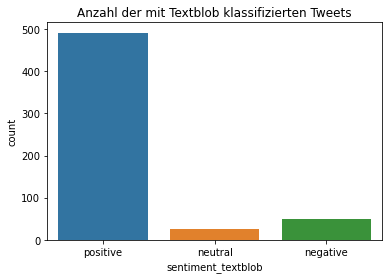

In [79]:
ax = sns.countplot(x="sentiment_textblob", data=tweets_and_stock_summarized,order=["positive","neutral","negative"]).set(title="Anzahl der mit Textblob klassifizierten Tweets");

In [80]:
#Quelle: #Quelle: https://towardsdatascience.com/the-best-python-sentiment-analysis-package-1-huge-common-mistake-d6da9ad6cdeb
tweets_and_stock_summarized["polarity_nltk"] = tweets_and_stock_summarized["Text"].apply(lambda x: nltk_sentiment.polarity_scores(x)["compound"])
tweets_and_stock_summarized["sentiment_nltk"] = np.select([tweets_and_stock_summarized["polarity_nltk"] < 0, 
                                             tweets_and_stock_summarized["polarity_nltk"] == 0, 
                                             tweets_and_stock_summarized["polarity_nltk"] > 0],
                                               ["negative", "neutral", "positive"])

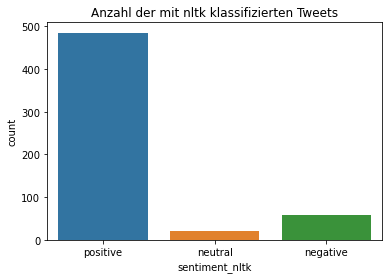

In [81]:
ax = sns.countplot(x="sentiment_nltk", data=tweets_and_stock_summarized,order=["positive","neutral","negative"]).set(title="Anzahl der mit nltk klassifizierten Tweets");

In [82]:
tweets_and_stock_summarized.head()

,Date,Tesla Stock Price,%-Change,Change,Text,polarity_textblob,sentiment_textblob,polarity_nltk,sentiment_nltk
0,2019-12-02,66.9740,1.4942,Higher,"People often think theyre breathing oxygen, bu...",0.1333,positive,0.0000,neutral
1,2019-12-03,67.2400,0.3972,Higher,"Yes, After a while, hydrogen became sentient,...",-0.0476,negative,0.4574,positive
2,2019-12-04,66.6060,-0.9429,Lower,Launching third flight of this Dragon spacecra...,0.0000,neutral,0.0000,neutral
3,2019-12-09,67.9060,1.0837,Higher,"Yeah, its one of my favorite Tshirts!",0.6250,positive,0.6696,positive
4,2019-12-10,69.7680,2.7420,Higher,"It really does, They smashed the window to ...",0.2077,positive,0.9353,positive


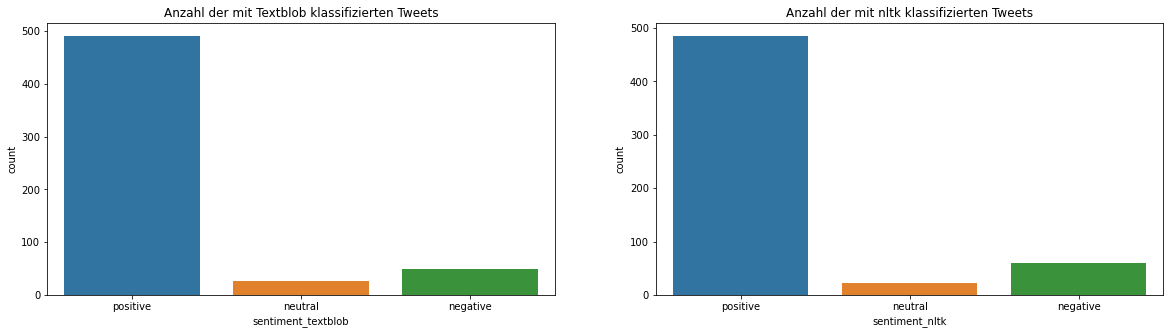

In [83]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,5))
sns.countplot(x = "sentiment_textblob", data = tweets_and_stock_summarized, order=["positive","neutral","negative"],
              ax = axs [0]).set(title = "Anzahl der mit Textblob klassifizierten Tweets");
sns.countplot(x = "sentiment_nltk", data = tweets_and_stock_summarized, order = ["positive","neutral","negative"],
              ax = axs [1]).set(title = "Anzahl der mit nltk klassifizierten Tweets");

Es fällt auf, dass nun fast alle Tweets sowohl von textblob als auch von nltk als positiv klassifiziert wurden.

Es werden wieder alle Zeilen behalten, bei denen textblob und nltk das gleiche Ergebnis bei positiv, neutral oder negativ liefern. Anschließend werden die neutralen Zeilen enfernt, da diese keine Aussagekraft haben.

In [84]:
cols = ["sentiment_textblob","sentiment_nltk"]
tweets_and_stock_summarized["new_sentiment"] =tweets_and_stock_summarized[cols].eq(tweets_and_stock_summarized[cols[0]], axis=0).all(axis=1)
tweets_and_stock_summarized = tweets_and_stock_summarized[tweets_and_stock_summarized.new_sentiment]
tweets_and_stock_summarized =tweets_and_stock_summarized[tweets_and_stock_summarized["sentiment_textblob"] != "neutral"]

In [85]:
print("Anzahl der Aktienkurse die mit Higher klassifiziert sind:",tweets_and_stock_summarized["Change"][tweets_and_stock_summarized["Change"] == "Higher"].count())
higer_positive_summarized=tweets_and_stock_summarized[(tweets_and_stock_summarized["Change"] == "Higher") & (tweets_and_stock_summarized["sentiment_textblob"] == "positive")].count()
print("Anzahl der Aktienkurse die mit Higher und positive klassifiziert sind:",higer_positive_summarized["Change"])
higher_negative_summarized=tweets_and_stock_summarized[(tweets_and_stock_summarized["Change"] == "Higher") & (tweets_and_stock_summarized["sentiment_textblob"] == "negative")].count()
print("Anzahl der Aktienkurse die mit Higher und negative klassifiziert sind:",higher_negative_summarized["Change"])

Anzahl der Aktienkurse die mit Higher klassifiziert sind: 267
Anzahl der Aktienkurse die mit Higher und positive klassifiziert sind: 254
Anzahl der Aktienkurse die mit Higher und negative klassifiziert sind: 13


In [86]:
print("Anzahl der Aktienkurse die mit Lower klassifiziert sind:",tweets_and_stock_summarized["Change"][tweets_and_stock_summarized["Change"] == "Lower"].count())
lower_negative_summarized=tweets_and_stock_summarized[(tweets_and_stock_summarized["Change"] == "Lower") & (tweets_and_stock_summarized["sentiment_textblob"] == "negative")].count()
print("Anzahl der Aktienkurse die mit Lower und negative klassifiziert sind:",lower_negative_summarized["Change"])
lower_positive_summarized=tweets_and_stock_summarized[(tweets_and_stock_summarized["Change"] == "Lower") & (tweets_and_stock_summarized["sentiment_textblob"] == "positive")].count()
print("Anzahl der Aktienkurse die mit Lower und positive klassifiziert sind:",lower_positive_summarized["Change"])

Anzahl der Aktienkurse die mit Lower klassifiziert sind: 203
Anzahl der Aktienkurse die mit Lower und negative klassifiziert sind: 9
Anzahl der Aktienkurse die mit Lower und positive klassifiziert sind: 194


###### ⚠️  Bei Zusammenfassung der Tweets werden zu viele Tweets als Positiv klassifiziert.

###### weiterers Vorgehen: Tweets mit Schlüsselwörtern

In [87]:
tesla_tweets=pd.read_csv(r"elon_musk_tweets_for_nlp.csv")

Filtern der Tweets nach bestimmten Schlüsselnwörtern, die in einer Liste definiert wurden. <br>
Im Anschluss daran wieder Klassifizierung der Tweets mit textblob und nltk.

In [88]:
sarch_words = ["tesla", "car","model","engine","production","lithium","battery","factory","electric"]
tesla_tweets=tesla_tweets[tesla_tweets["Text"].str.contains('|'.join(sarch_words))]

In [89]:
tesla_tweets["polarity_textblob"] = tesla_tweets["Text"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
tesla_tweets["sentiment_textblob"] =tesla_tweets["polarity_textblob"].apply(
    lambda x: "positive" if x>0 else "neutral" if x==0 else "negative") 

In [90]:
tweets_and_stock_summarized.head()

,Date,Tesla Stock Price,%-Change,Change,Text,polarity_textblob,sentiment_textblob,polarity_nltk,sentiment_nltk,new_sentiment
3,2019-12-09,67.9060,1.0837,Higher,"Yeah, its one of my favorite Tshirts!",0.6250,positive,0.6696,positive,True
4,2019-12-10,69.7680,2.7420,Higher,"It really does, They smashed the window to ...",0.2077,positive,0.9353,positive,True
6,2019-12-12,71.9360,1.9790,Higher,We are literally a brain in a vat. The vat is...,0.0803,positive,0.7133,positive,True
7,2019-12-13,71.6780,-0.3586,Lower,"Age of Napoleon is excellent, T...",0.5333,positive,0.7579,positive,True
8,2019-12-17,75.7980,-0.6579,Lower,"Some good ideas here!, Telemetry indicates s...",0.4875,positive,0.5093,positive,True


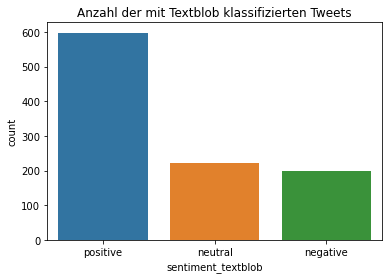

In [91]:
ax = sns.countplot(x="sentiment_textblob", data=tesla_tweets,order=["positive","neutral","negative"]).set(title="Anzahl der mit Textblob klassifizierten Tweets");

In [92]:
# Quelle: https://towardsdatascience.com/the-best-python-sentiment-analysis-package-1-huge-common-mistake-d6da9ad6cdeb
tesla_tweets["polarity_nltk"] = tesla_tweets["Text"].apply(lambda x: nltk_sentiment.polarity_scores(x)["compound"])
tesla_tweets["sentiment_nltk"] = np.select([tesla_tweets["polarity_nltk"] < 0, 
                                            tesla_tweets["polarity_nltk"] == 0, 
                                             tesla_tweets["polarity_nltk"] > 0],
                                               ["negative", "neutral", "positive"])

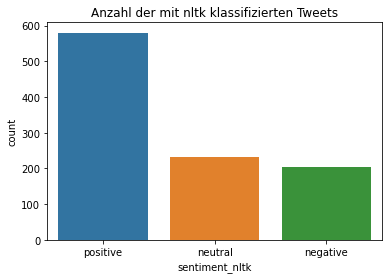

In [93]:
ax = sns.countplot(x="sentiment_nltk", data=tesla_tweets,order=["positive","neutral","negative"]).set(title="Anzahl der mit nltk klassifizierten Tweets");

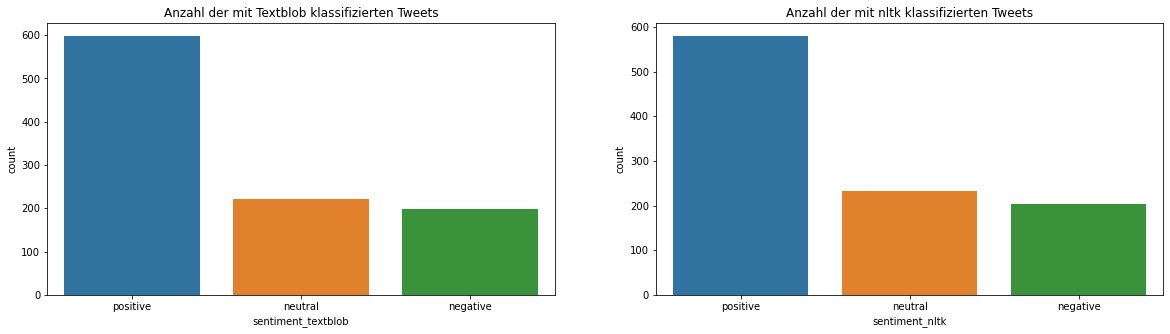

In [94]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,5))
sns.countplot(x = "sentiment_textblob", data = tesla_tweets, order = ["positive","neutral","negative"], 
              ax = axs[0]).set(title = "Anzahl der mit Textblob klassifizierten Tweets");
sns.countplot(x = "sentiment_nltk", data = tesla_tweets, order = ["positive","neutral","negative"], 
              ax = axs[1]).set(title = "Anzahl der mit nltk klassifizierten Tweets");

Verknüpfen des Dataframes mit dem Aktienkurs und nur noch beibehalten der gleichen sentiments.

In [95]:
tesla_tweets["Date"] = pd.to_datetime(tesla_tweets["Date"])
tesla_tweets = pd.merge(df_tesla, tesla_tweets, how="inner", on="Date")
cols = ["sentiment_textblob","sentiment_nltk"]
tesla_tweets["new_sentiment"] =tesla_tweets[cols].eq(tesla_tweets[cols[0]], axis=0).all(axis=1)
tesla_tweets = tesla_tweets[tesla_tweets["sentiment_textblob"] != "neutral"]
tesla_tweets = tesla_tweets[tesla_tweets.new_sentiment]
tesla_tweets = tesla_tweets.drop("new_sentiment", 1)

In [96]:
tesla_tweets.head()

,Date,Tesla Stock Price,%-Change,Change,Text,likes,retweets,replys,polarity_textblob,sentiment_textblob,polarity_nltk,sentiment_nltk
0,2019-12-10,69.7680,2.7420,Higher,they smashed the window to steal the radio w...,10511,287,261,0.4300,positive,0.8622,positive
1,2019-12-10,69.7680,2.7420,Higher,yeah 1978 320i that i bought in 93 for 1400....,3797,139,88,-0.2500,negative,-0.2732,negative
5,2019-12-19,80.8080,2.7699,Higher,this is quite a thorny hardware problem as t...,571,51,64,0.2167,positive,0.1369,positive
6,2019-12-19,80.8080,2.7699,Higher,tesla moth mode better late than never,170476,18025,1139,0.1000,positive,0.4404,positive
8,2019-12-24,85.0500,1.4384,Higher,he was awesome. i squared r heating is why ro...,2585,115,103,0.4750,positive,0.7783,positive


In [97]:
tesla_tweets.describe()

,Tesla Stock Price,%-Change,likes,retweets,replys,polarity_textblob,polarity_nltk
count,359.0000,359.0000,359.0000,359.0000,359.0000,359.0000,359.0000
mean,555.5803,1.6368,27558.8802,1910.9276,1301.6435,0.2226,0.3997
std,298.8978,4.7416,57884.2699,5611.7197,3590.5949,0.3124,0.4568
min,69.7680,-16.0344,571.0000,34.0000,19.0000,-0.7500,-0.8934
25%,307.9200,-0.9792,3135.5000,177.5000,156.0000,0.0554,0.2013
50%,630.2700,1.3180,6983.0000,478.0000,356.0000,0.2000,0.5165
75%,764.3450,3.6990,19815.0000,1125.5000,955.0000,0.3721,0.7684
max,1172.0000,19.8949,575345.0000,64216.0000,54946.0000,1.0000,0.9657


In [98]:
print("Anzahl der Aktienkurse die mit Higher klassifiziert sind:",tesla_tweets["Change"][tesla_tweets["Change"] == "Higher"].count())
higer_positive_tesla=tesla_tweets[(tesla_tweets["Change"] == "Higher") & (tesla_tweets["sentiment_textblob"] == "positive")].count()
print("Anzahl der Aktienkurse die mit Higher und positive klassifiziert sind:",higer_positive_tesla["Change"])
higher_negative_tesla=tesla_tweets[(tesla_tweets["Change"] == "Higher") & (tesla_tweets["sentiment_textblob"] == "negative")].count()
print("Anzahl der Aktienkurse die mit Higher und negative klassifiziert sind:",higher_negative_tesla["Change"])

Anzahl der Aktienkurse die mit Higher klassifiziert sind: 224
Anzahl der Aktienkurse die mit Higher und positive klassifiziert sind: 181
Anzahl der Aktienkurse die mit Higher und negative klassifiziert sind: 43


In [99]:
print("Anzahl der Aktienkurse die mit Lower klassifiziert sind:",tesla_tweets["Change"][tesla_tweets["Change"] == "Lower"].count())
lower_negative_tesla=tesla_tweets[(tesla_tweets["Change"] == "Lower") & (tesla_tweets["sentiment_textblob"] == "negative")].count()
print("Anzahl der Aktienkurse die mit Lower und negative klassifiziert sind:",lower_negative_tesla["Change"])
lower_positive_tesla=tesla_tweets[(tesla_tweets["Change"] == "Lower") & (tesla_tweets["sentiment_textblob"] == "positive")].count()
print("Anzahl der Aktienkurse die mit Lower und positive klassifiziert sind:",lower_positive_tesla["Change"])

Anzahl der Aktienkurse die mit Lower klassifiziert sind: 135
Anzahl der Aktienkurse die mit Lower und negative klassifiziert sind: 23
Anzahl der Aktienkurse die mit Lower und positive klassifiziert sind: 112


Erzeugen einer Confusion Matrix.

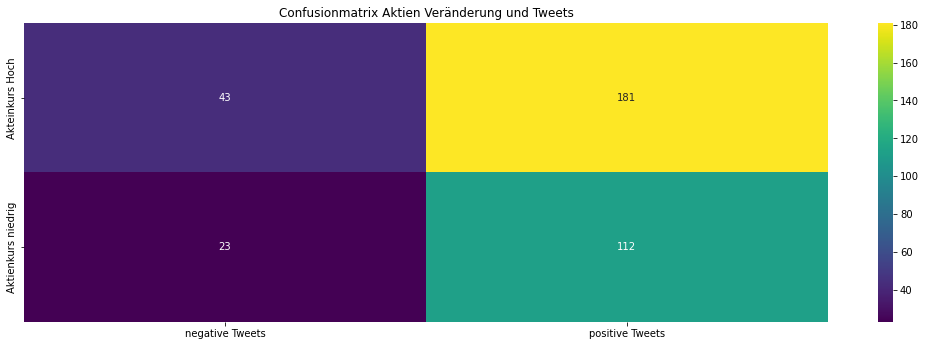

In [100]:
plt.figure(figsize=(18,5.5))
tesla_tweets["actual"] = tesla_tweets["Change"].map({"Higher": "Akteinkurs Hoch", "Lower": "Aktienkurs niedrig"})
tesla_tweets["predicted"] = tesla_tweets["sentiment_textblob"].map(
    {"positive": "positive Tweets", "negative": "negative Tweets"})
confusion_matrix = pd.crosstab(tesla_tweets["actual"], tesla_tweets["predicted"],rownames=[""], colnames=[""])
sns.heatmap(confusion_matrix, annot=True, fmt="d",cmap="viridis").set(
    title="Confusionmatrix Aktien Veränderung und Tweets");

Confusion Matrix als Prozent Werte.

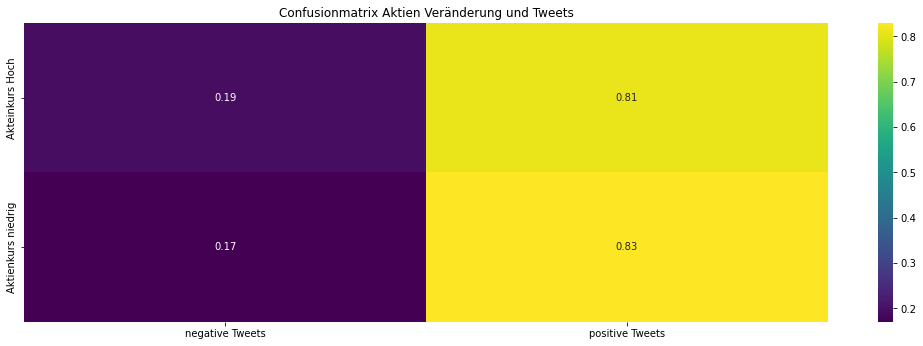

In [101]:
plt.figure(figsize=(18,5.5))
confusion_matrix_percent = pd.crosstab(
    tesla_tweets["actual"], tesla_tweets["predicted"], rownames=[""], colnames=[""],normalize="index")
sns.heatmap(confusion_matrix_percent , annot=True,cmap="viridis").set(
    title="Confusionmatrix Aktien Veränderung und Tweets");

#### Confusionmatrix zeigt, das die meisten Tweets als Postiv klassifiziert werden, unabhängig davon ob der Aktienkurs bei Higer oder Lower ist.

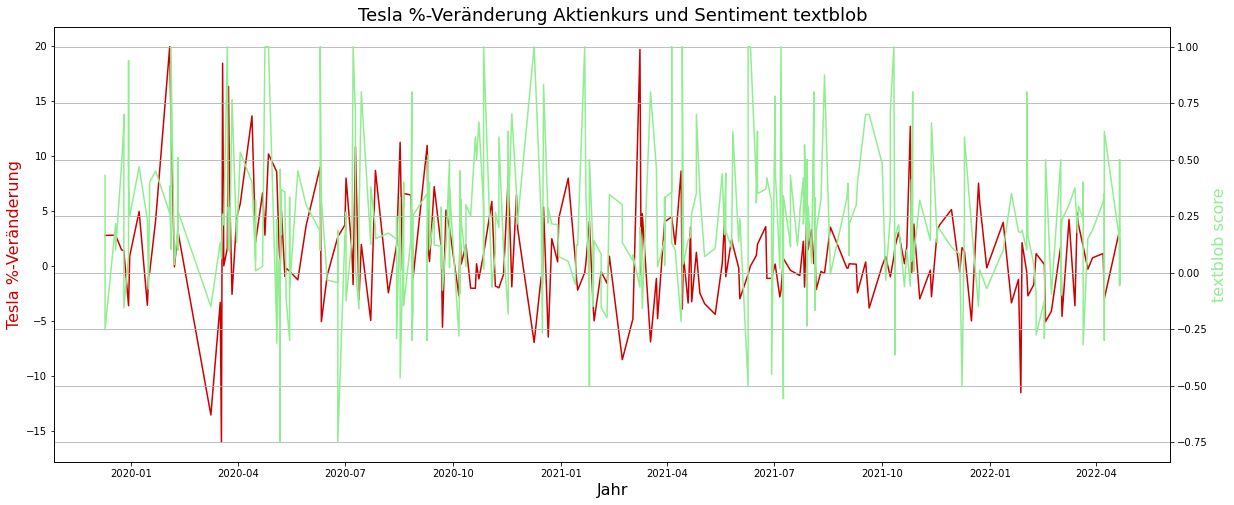

In [102]:
fig,ax = plt.subplots(1,1, figsize=(20,8))
ax.plot(tesla_tweets["Date"], tesla_tweets["%-Change"], color="#cc0000")
ax.set_xlabel("Jahr",fontsize=16)
ax.set_ylabel("Tesla %-Veränderung",color="#cc0000",fontsize=16)
ax2=ax.twinx()
ax2.plot(tesla_tweets["Date"], tesla_tweets["polarity_textblob"], color="lightgreen")
ax2.set_ylabel("textblob score",color="lightgreen",fontsize=16)
plt.title("Tesla %-Veränderung Aktienkurs und Sentiment textblob", fontsize=18)
plt.grid(visible=True);

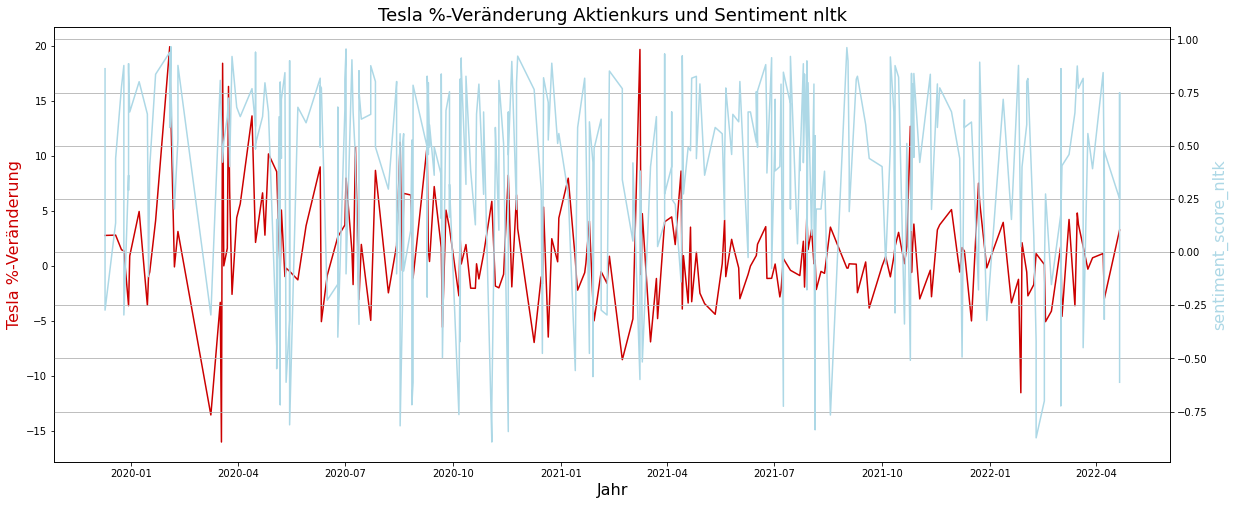

In [103]:
fig,ax = plt.subplots(1,1, figsize=(20,8))
ax.plot(tesla_tweets["Date"], tesla_tweets["%-Change"], color="#cc0000")
ax.set_xlabel("Jahr",fontsize=16)
ax.set_ylabel("Tesla %-Veränderung",color="#cc0000",fontsize=16)
ax2=ax.twinx()
ax2.plot(tesla_tweets["Date"], tesla_tweets["polarity_nltk"], color="lightblue")
ax2.set_ylabel("sentiment_score_nltk",color="lightblue",fontsize=16)
plt.title("Tesla %-Veränderung Aktienkurs und Sentiment nltk", fontsize=18)
plt.grid(visible=True);

In [104]:
corr=tesla_tweets.corr()

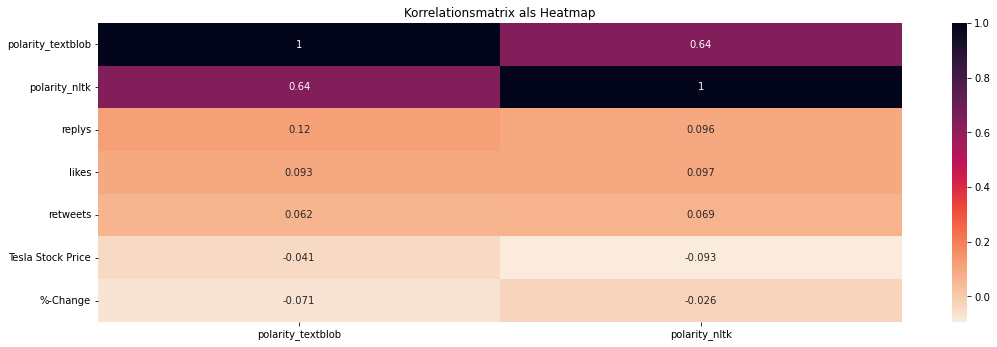

In [105]:
plt.figure(figsize=(18,5.5))
corr=corr[["polarity_textblob","polarity_nltk"]]
corr=corr.sort_values(by="polarity_textblob", ascending=False)
sns.heatmap(corr, cmap="rocket_r",annot=True).set(title="Korrelationsmatrix als Heatmap")
plt.show()

#### Verschiebung der Spalten "%-Change" und "Tesla Stock Price" um jeweils einen Tag.

In [106]:
tesla_tweets[["%-Change","Tesla Stock Price"]] = tesla_tweets[["%-Change","Tesla Stock Price"]].shift(1)

In [107]:
tesla_tweets.head()

,Date,Tesla Stock Price,%-Change,Change,Text,likes,retweets,replys,polarity_textblob,sentiment_textblob,polarity_nltk,sentiment_nltk,actual,predicted
0,2019-12-10,NaN,NaN,Higher,they smashed the window to steal the radio w...,10511,287,261,0.4300,positive,0.8622,positive,Akteinkurs Hoch,positive Tweets
1,2019-12-10,69.7680,2.7420,Higher,yeah 1978 320i that i bought in 93 for 1400....,3797,139,88,-0.2500,negative,-0.2732,negative,Akteinkurs Hoch,negative Tweets
5,2019-12-19,69.7680,2.7420,Higher,this is quite a thorny hardware problem as t...,571,51,64,0.2167,positive,0.1369,positive,Akteinkurs Hoch,positive Tweets
6,2019-12-19,80.8080,2.7699,Higher,tesla moth mode better late than never,170476,18025,1139,0.1000,positive,0.4404,positive,Akteinkurs Hoch,positive Tweets
8,2019-12-24,80.8080,2.7699,Higher,he was awesome. i squared r heating is why ro...,2585,115,103,0.4750,positive,0.7783,positive,Akteinkurs Hoch,positive Tweets


In [108]:
corr=tesla_tweets.corr()

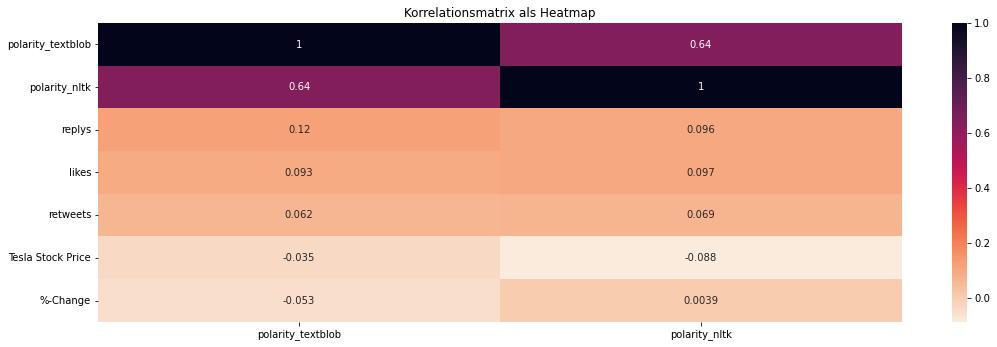

In [109]:
plt.figure(figsize=(18,5.5))
corr=corr[["polarity_textblob","polarity_nltk"]]
corr=corr.sort_values(by="polarity_textblob", ascending=False)
sns.heatmap(corr, cmap="rocket_r",annot=True).set(title="Korrelationsmatrix als Heatmap")
plt.show()

### Ergebnis: Wir konnten keine Korrelation zwischen den mit textblob/nltk klassifizierten Tweets und dem Tesla Aktienkurs feststellen.

### Verwendete Versionen der Bibliotheken im Notebook

In [110]:
print("yfinance Version: "+yf.__version__)
print("pandas Version: "+pd.__version__)
print("numpy Version: "+np.__version__)
import matplotlib
print("matplotlib Version: "+matplotlib.__version__)
print("seaborn Version: "+sns.__version__)
print("snscrape Version ist hier verfügbar: https://github.com/JustAnotherArchivist/snscrape")
import wordcloud
print("wordcloud Version:"+wordcloud.__version__)
print("nltk Version: "+nltk.__version__)
import textblob
print("textblob Version: "+textblob.__version__)
print("flair Version: "+flair.__version__)
print("tqdm Version ist hier verfügbar: https://github.com/tqdm/tqdm")

yfinance Version: 0.1.70
pandas Version: 1.3.4
numpy Version: 1.20.3
matplotlib Version: 3.4.3
seaborn Version: 0.11.2
snscrape Version ist hier verfügbar: https://github.com/JustAnotherArchivist/snscrape
wordcloud Version:1.8.1
nltk Version: 3.6.5
textblob Version: 0.17.1
flair Version: 0.11.1
tqdm Version ist hier verfügbar: https://github.com/tqdm/tqdm
